In [47]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Source data location
source_file_loc = 'source_data/'

# 1a.) Read in housing dataset into dataframe
data_file = 'housing_data_cleaned.csv'

housing_df_clean = pd.read_csv(source_file_loc + data_file,low_memory=False)

In [48]:
housing_df_clean.columns

Index(['basements', 'building_code_description', 'category_code_description',
       'census_tract', 'central_air', 'depth', 'exempt_building',
       'exempt_land', 'exterior_condition', 'fireplaces', 'frontage', 'fuel',
       'garage_spaces', 'garage_type', 'geographic_ward', 'interior_condition',
       'location', 'market_value', 'market_value_date', 'number_of_bathrooms',
       'number_of_bedrooms', 'number_of_rooms', 'number_stories',
       'quality_grade', 'sale_date', 'sale_price', 'street_designation',
       'street_direction', 'street_name', 'taxable_building', 'taxable_land',
       'topography', 'total_area', 'total_livable_area', 'type_heater', 'unit',
       'view_type', 'year_built', 'year_built_estimate', 'zip_code', 'zoning'],
      dtype='object')

In [49]:
housing_df_clean

,basements,building_code_description,category_code_description,census_tract,central_air,depth,exempt_building,exempt_land,exterior_condition,fireplaces,...,topography,total_area,total_livable_area,type_heater,unit,view_type,year_built,year_built_estimate,zip_code,zoning
0,D,ROW 3 STY MASONRY,Single Family,241.0,N,67.0,49200,0,4.0,0.0,...,F,938.00,1344.0,A,NaN,I,1895,Y,19144.0,RSA5
1,NaN,RES CONDO 3 STY MAS+OTH,Single Family,337.0,Y,0.0,45000,0,4.0,0.0,...,NaN,0.00,947.0,NaN,B307,I,1970,Y,19152.0,RM2
2,NaN,ROW 2 STY MASONRY,Single Family,201.0,NaN,70.0,0,0,4.0,0.0,...,F,1044.00,1190.0,NaN,NaN,I,1940,Y,19140.0,RM1
3,H,ROW B/GAR 2 STY MASONRY,Single Family,281.0,N,95.5,0,0,4.0,0.0,...,F,1686.53,1633.0,B,NaN,I,1940,Y,19141.0,RSA3
4,NaN,ROW 2 STY MASONRY,Single Family,293.0,NaN,112.5,0,0,4.0,0.0,...,F,2165.62,1320.0,B,NaN,I,1940,Y,19124.0,RSA5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99474,C,ROW 3 STY MASONRY,Single Family,140.0,N,62.0,0,0,4.0,0.0,...,F,868.00,1722.0,B,NaN,I,1920,Y,19130.0,RM1
99475,NaN,APT 2-4 UNITS 2 STY MAS+O,Multi Family,357.0,Y,100.0,0,0,4.0,0.0,...,F,3923.00,1700.0,NaN,NaN,I,1972,Y,19116.0,RSA3
99476,C,ROW 2 STY MASONRY,Single Family,180.0,N,54.5,45000,0,3.0,0.0,...,F,763.00,1070.0,B,NaN,I,1920,Y,19134.0,RSA5
99477,NaN,S/D CONV APT 3 STY MASON,Multi Family,78.0,NaN,87.5,0,0,3.0,0.0,...,F,2100.00,2304.0,NaN,NaN,I,1920,NaN,19143.0,RSA3


In [50]:
housing_df_clean["category_code_description"].value_counts()

Single Family    88448
Multi Family      8383
Mixed Use         2648
Name: category_code_description, dtype: int64

In [51]:
housing_df_clean["sale_price"].min()

1000

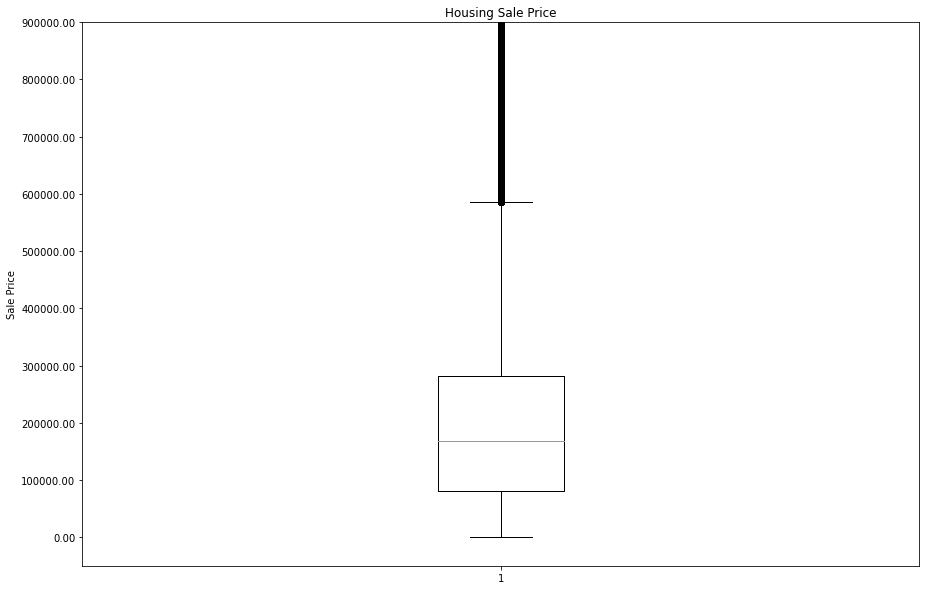

In [52]:
housing_df_clean.columns
sales = housing_df_clean['sale_price']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Housing Sale Price')
ax1.set_ylabel('Sale Price')
ax1.boxplot(sales)

top = 900000
bottom = -50000
ax1.set_ylim(bottom, top)

ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%2.2f'))

loc = matplotlib.ticker.MultipleLocator(base=100000.0) 
ax1.yaxis.set_major_locator(loc)


plt.show()


In [53]:
quartiles = sales.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of sale price is: {lowerq}")
print(f"The upper quartile of sale price is: {upperq}")
print(f"The interquartile range of sale price is: {iqr}")
print(f"The the median of sale price is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of sale price is: 80000.0
The upper quartile of sale price is: 282000.0
The interquartile range of sale price is: 202000.0
The the median of sale price is: 168000.0 
Values below -223000.0 could be outliers.
Values above 585000.0 could be outliers.


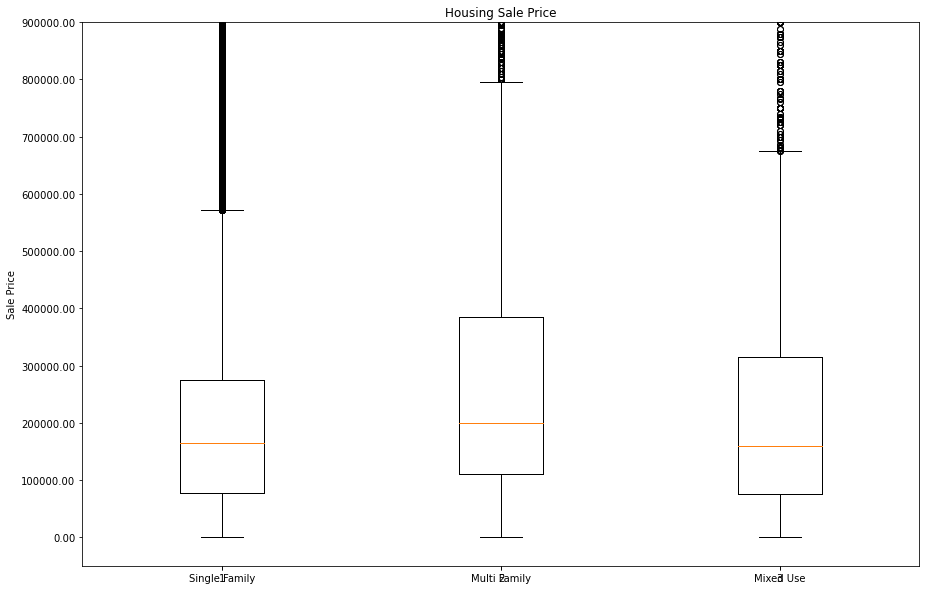

In [54]:
code_list = ["Single Family", "Multi Family", "Mixed Use"]

category_code_list= housing_df_clean.groupby('category_code_description')['sale_price'].apply(list)
category_code_list_df = pd.DataFrame(category_code_list)
category_code_list_df = category_code_list_df.reindex(code_list)
sale_price = [price for price in category_code_list_df['sale_price']]



fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Housing Sale Price')
ax1.set_ylabel('Sale Price')
ax1.boxplot(sale_price)

top = 900000
bottom = -50000
ax1.set_ylim(bottom, top)

ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%2.2f'))

loc = matplotlib.ticker.MultipleLocator(base=100000.0) 
ax1.yaxis.set_major_locator(loc)

plt.boxplot(sale_price, labels=code_list)

plt.show()

In [55]:
category_code_list_df

,sale_price
category_code_description,
Single Family,"[90000, 145000, 52500, 154000, 65900, 185000, ..."
Multi Family,"[247000, 470000, 225000, 120000, 155000, 15000..."
Mixed Use,"[100000, 95000, 215000, 130000, 158000, 190000..."


In [56]:
single_family_df = housing_df_clean.loc[housing_df_clean["category_code_description"] == "Single Family",:]['sale_price']
multi_family_df = housing_df_clean.loc[housing_df_clean["category_code_description"] == "Multi Family",:]['sale_price']
mixed_use_df = housing_df_clean.loc[housing_df_clean["category_code_description"] == "Mixed Use",:]['sale_price']


quartiles = single_family_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile sale price for single family housing is: {lowerq}")
print(f"The upper quartile sale price for single family housing is: {upperq}")
print(f"The interquartile range for single family housing is: {iqr}")
print(f"The median of sale price for single family housing is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile sale price for single family housing is: 77000.0
The upper quartile sale price for single family housing is: 275000.0
The interquartile range for single family housing is: 198000.0
The median of sale price for single family housing is: 165000.0 
Values below -220000.0 could be outliers.
Values above 572000.0 could be outliers.


In [57]:
quartiles = multi_family_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile sale price for multi family housing is: {lowerq}")
print(f"The upper quartile sale price for multi family housing is: {upperq}")
print(f"The interquartile range for multi family housing is: {iqr}")
print(f"The median of sale price for multi family housing is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile sale price for multi family housing is: 110000.0
The upper quartile sale price for multi family housing is: 385000.0
The interquartile range for multi family housing is: 275000.0
The median of sale price for multi family housing is: 200000.0 
Values below -302500.0 could be outliers.
Values above 797500.0 could be outliers.


In [58]:
quartiles = mixed_use_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile sale price for mixed use housing is: {lowerq}")
print(f"The upper quartile sale price for mixed use housing is: {upperq}")
print(f"The interquartile range for mixed use housing is: {iqr}")
print(f"The median of sale price for mixed use housing is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile sale price for mixed use housing is: 75000.0
The upper quartile sale price for mixed use housing is: 315000.0
The interquartile range for mixed use housing is: 240000.0
The median of sale price for mixed use housing is: 160000.0 
Values below -285000.0 could be outliers.
Values above 675000.0 could be outliers.
